# Assignment 3: Sensitivity Analysis with Sobol Indices
#### Moritz Kick, Maximilian Nowak

In [33]:
# Import modules from source
import os, sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

from sinfo import sinfo
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
assignment2 NA
assignment3 NA
matplotlib  3.6.2
numpy       1.23.5
sinfo       0.3.4
-----
IPython             8.10.0
jupyter_client      7.4.9
jupyter_core        5.2.0
jupyterlab          3.5.3
notebook            6.5.4
-----
Python 3.11.0 (main, Mar  1 2023, 18:26:19) [GCC 11.2.0]
Linux-5.10.16.3-microsoft-standard-WSL2-x86_64-with-glibc2.31
8 logical CPU cores, x86_64
-----
Session information updated at 2023-06-17 20:05


## Implementation of Sobol indices

### 1. Implement the construction of Sobol matrices

In [34]:
from assignment3.sobol import create_sobol_matrices

pass

### 2. Implement the computation of Sobol total-effect indices

In [35]:
from assignment3.sobol import compute_total_indices

pass

### 3. Verify your implementation

##### Test construction of Sobol matrices with different matrix sizes

In [36]:
from assignment2.lhs import latin_hypercube_uniform

for n_samples, dim in [(3,3), (4,4)]:
    A, B = latin_hypercube_uniform(dim, n_samples), latin_hypercube_uniform(dim, n_samples)  # Generate random samples
    A_B = create_sobol_matrices(A, B)  # Get sobol matrices

    print("Test %ix%i input matrices:" % (n_samples, dim))
    print("A:\n %s" % np.round(A, 4))
    print("B:\n %s" % np.round(B, 4))
    print("A_B:\n %s\n" % np.round(A_B, 4))

Test 3x3 input matrices:
A:
 [[0.3764 0.1678 0.1669]
 [0.7483 0.9533 0.7495]
 [0.1731 0.4345 0.6518]]
B:
 [[0.5646 0.9981 0.5185]
 [0.8771 0.307  0.7571]
 [0.0861 0.4933 0.3001]]
A_B:
 [[[0.5646 0.1678 0.1669]
  [0.8771 0.9533 0.7495]
  [0.0861 0.4345 0.6518]]

 [[0.3764 0.9981 0.1669]
  [0.7483 0.307  0.7495]
  [0.1731 0.4933 0.6518]]

 [[0.3764 0.1678 0.5185]
  [0.7483 0.9533 0.7571]
  [0.1731 0.4345 0.3001]]]

Test 4x4 input matrices:
A:
 [[0.1753 0.2382 0.2837 0.1545]
 [0.9741 0.3905 0.8383 0.3399]
 [0.667  0.7395 0.1336 0.9423]
 [0.4619 0.8156 0.6779 0.6323]]
B:
 [[0.2251 0.2512 0.788  0.0578]
 [0.3135 0.1782 0.3783 0.4225]
 [0.8498 0.8433 0.7423 0.5142]
 [0.5343 0.5963 0.1569 0.8608]]
A_B:
 [[[0.2251 0.2382 0.2837 0.1545]
  [0.3135 0.3905 0.8383 0.3399]
  [0.8498 0.7395 0.1336 0.9423]
  [0.5343 0.8156 0.6779 0.6323]]

 [[0.1753 0.2512 0.2837 0.1545]
  [0.9741 0.1782 0.8383 0.3399]
  [0.667  0.8433 0.1336 0.9423]
  [0.4619 0.5963 0.6779 0.6323]]

 [[0.1753 0.2382 0.788  0.1545]
  

##### Test computation of total-effect Sobol indices

In [37]:
from assignment2.lhs import latin_hypercube_uniform

# Generate matrices with Latin hypercube samples
n_samples = 100000
dim = 2
A, B = latin_hypercube_uniform(dim, n_samples), latin_hypercube_uniform(dim, n_samples)

# Get sobol matrices
A_B = create_sobol_matrices(A, B)

# Define the functions to be tested
funcs = {
    'f = x1 + x2': lambda X: X[:, 0] + X[:, 1],
    'f = 2*x1 + x2': lambda X: 2*X[:, 0] + X[:, 1],
    'f = sqrt(2)*x1 + x2': lambda X: (2**(1/2))*X[:, 0] + X[:, 1],
    'f = sqrt(2)*x1 + 10*x1x2 + x2': lambda X: (2**(1/2))*X[:, 0] + 10*(X[:, 0]*X[:, 1]) + X[:, 1],
    'f = sqrt(2)*x1 + log(x1x2) + x2': lambda X: (2**(1/2))*X[:, 0] + np.log(X[:, 0]*X[:, 1]) + X[:, 1],
}

# Compute indicies and display results
for fname, f in funcs.items():
    f_A = f(A)
    f_AB = np.array([f(X) for X in A_B])
    r = compute_total_indices(f_A, f_AB)
    print(fname)
    print("   sti: %.6f, %.6f" % (r[0], r[1]))
    print("   sum: %.6f" % (np.sum(r)))

f = x1 + x2
   sti: 0.499465, 0.496952
   sum: 0.996418
f = 2*x1 + x2
   sti: 0.799131, 0.198778
   sum: 0.997908
f = sqrt(2)*x1 + x2
   sti: 0.665950, 0.331300
   sum: 0.997250
f = sqrt(2)*x1 + 10*x1x2 + x2
   sti: 0.577849, 0.514925
   sum: 1.092773
f = sqrt(2)*x1 + log(x1x2) + x2
   sti: 0.540322, 0.456599
   sum: 0.996921


## Application to the model

### 4. Construct sample matrices $A, B ∈ R^{N×n}$

In [38]:
from assignment2.lhs import latin_hypercube_uniform

# Construct parameter domain like in assignment 2

beta_range = [1, 3]  # average number of contacts per week
alpha_range = [7/14, 7/2]  # mean latency rate per week
gamma_range = [7/14, 7/7]  # mean recovery rate per week
i0_range = [500, 2500]  # initial number of infected individuals

param_domain = np.array([beta_range, alpha_range, gamma_range, i0_range])

# construct samples A and B by LHS sampling
dim = 4
n_samples = 1000
A = latin_hypercube_uniform(dim=dim, n_samples=n_samples, low=param_domain[:, 0], high=param_domain[:, 1])
B = latin_hypercube_uniform(dim=dim, n_samples=n_samples, low=param_domain[:, 0], high=param_domain[:, 1])

# prepare matrices to sample parameter combinations
A_B = create_sobol_matrices(A, B)

print(A.shape)
print(B.shape)
print(A_B.shape)

(1000, 4)
(1000, 4)
(4, 1000, 4)


### 5. Compute vectors $\mathcal{G}_l(A) ∈ R^N$ and $\mathcal{G}_l(A_B^{(i)}) ∈ R^N$

In [39]:
from assignment3.sobol import compute_QoIs_from_samples

# Define initial conditions and parameters
N = 80e6
I0 = 1000
S0 = N - I0
E0 = 0
R0 = 0
C0 = I0
y0 = [N, S0, E0, I0, R0, C0]

# Simulation time
T = 60
t = np.linspace(0, T, T+1)

# get QoI vectors by running seirc with samples from A
g1_A, g2_A = compute_QoIs_from_samples(A, args=(y0, t))

# get QoI vectors by running seirc with sample matrices from A_B
qoIs_A_B = np.array([compute_QoIs_from_samples(A_Bi, args=(y0, t)) for A_Bi in A_B])
g1_A_B, g2_A_B = qoIs_A_B[:, 0], qoIs_A_B[:, 1]


### 6. Compute all Sobol total-effect indices $S_{Ti}$

In [44]:
sTi_g1 = compute_total_indices(g1_A, g1_A_B)
sTi_g2 = compute_total_indices(g2_A, g2_A_B)

print('STis for G1: %s' % sTi_g1)
print('STis for G2: %s' % sTi_g2)

STis for G1: [0.89575912 0.03062478 0.38024428 0.00195466]
STis for G2: [0.85826545 0.13316368 0.17686204 0.00641856]


### 7.  Display the indices with a bar plot

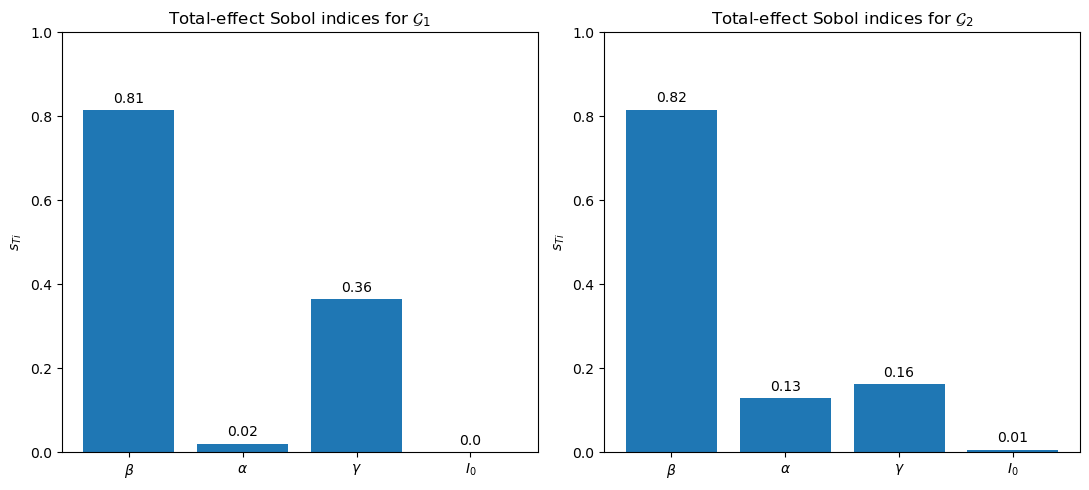

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
labels = [r'$\beta$', r'$\alpha$', r'$\gamma$', r'$I_0$']

# sTi1 for G1
bars1 = ax1.bar(labels, sTi_g1)
ax1.set_ylim(0, 1)
ax1.set_ylabel(r'$s_{Ti}$')
ax1.set_title(r'Total-effect Sobol indices for $\mathcal{G}_1$')

# Adding the exact sTi values on the bars for G1
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# sTi1 for G2
bars2 = ax2.bar(labels, sTi_g2)
ax2.set_ylim(0, 1)
ax2.set_ylabel(r'$s_{Ti}$')
ax2.set_title(r'Total-effect Sobol indices for $\mathcal{G}_2$')

# Adding the exact sTi1 values on the bars for G2
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 8. Find a way to quantify the "amount of interaction between the variables"

In [ ]:
# sum of all sTi will be one if there's no interaction

# interaction in G1
sum_sTi_g1 = np.sum(sTi_g1)
inter_Xi_g1 = sum_sTi_g1 - 1
print("Interaction between variables Xi in G1: %.6f" % inter_Xi_g1)

# interaction in G2
sum_sTi_g2 = np.sum(sTi_g2)
inter_Xi_g2 = sum_sTi_g2 - 1
print("Interaction between variables Xi in G2: %.6f" % inter_Xi_g2)

Interaction between variables Xi in G1: 0.200798
Interaction between variables Xi in G2: 0.112852
